In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.N = 0
        self.mean = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - (1.0/self.N))*self.mean + (1.0/self.N)*x

In [34]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax(b.mean for b in bandits)
        x = bandits[j].pull()
        bandits[j].update(x)
    
        data[i] = x
    cumulative_avg = np.cumsum(data)/(np.arange(N) + 1)  
    
    # plot moving average ctr
    plt.plot(cumulative_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)

    return cumulative_avg


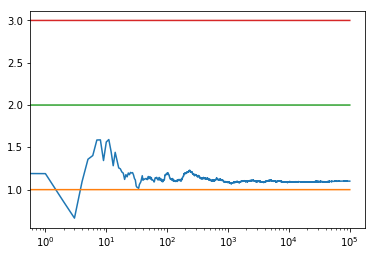

1.0011619256442592
2.0097054215471726
2.974838382743553


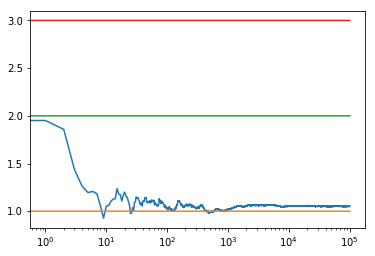

1.0002713897346187
1.9959622386242906
3.0243594472908577


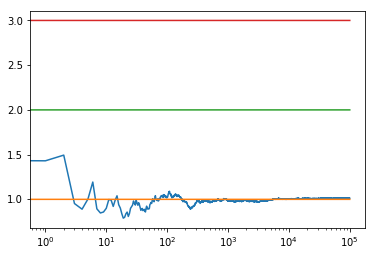

1.000637597740434
2.0151289044316885
3.0537922105037443


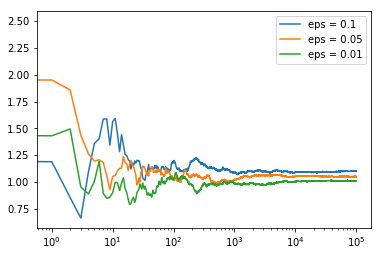

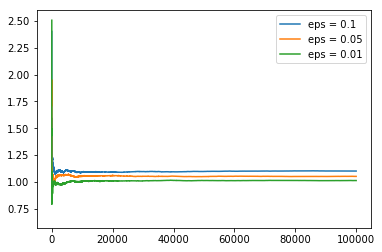

In [36]:
if __name__ == '__main__':
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)
    
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()